# Titanic Survival Prediction

This project predicts whether a passenger survived the Titanic disaster using machine learning.

The dataset contains information like age, gender, passenger class, ticket fare, and family size.  
We build a model to learn survival patterns and make predictions for new passengers.




In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
df = pd.read_csv("taitanicdt.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df = df.drop(columns=['Cabin'])

In [ ]:
df.columns = df.columns.str.lower()


In [ ]:
df.columns


Index(['passengerid', 'survived', 'pclass', 'name', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'sex_male', 'embarked_q', 'embarked_s'],
      dtype='object')

## Exploratory Data Analysis


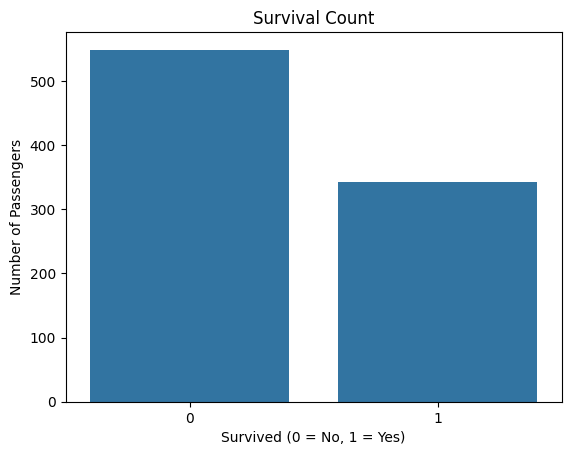

In [ ]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()


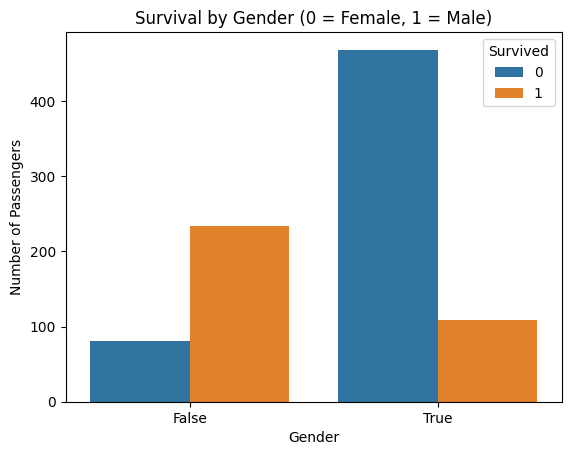

In [ ]:
sns.countplot(x='Sex_male', hue='Survived', data=df)
plt.title("Survival by Gender (0 = Female, 1 = Male)")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.show()


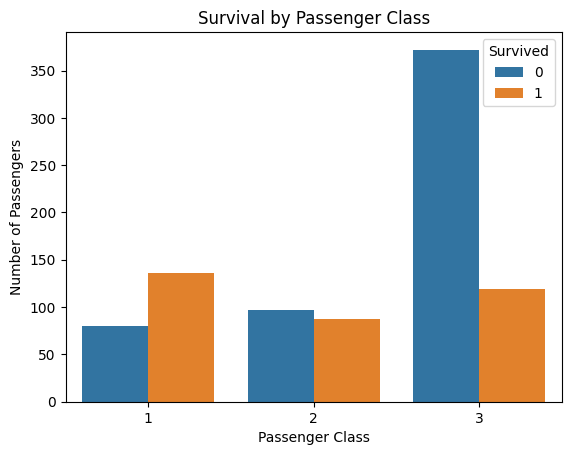

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.show()


## Model Training


In [ ]:
X = df[['pclass','age','sibsp','parch','fare','sex_male','embarked_q','embarked_s']]
y = df['survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



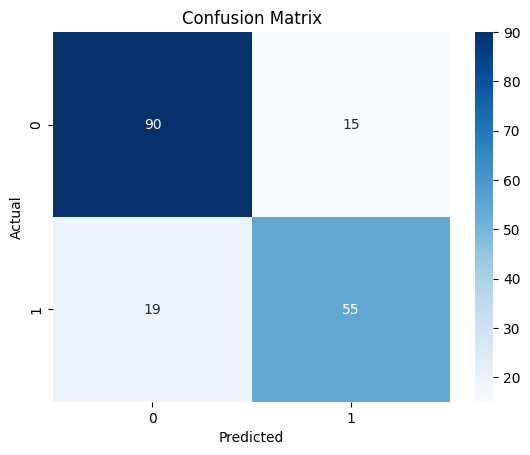

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

new_passenger = pd.DataFrame([[3, 25, 0, 0, 7.25, 1, 0, 1]],
    columns=['pclass','age','sibsp','parch','fare','sex_male','embarked_q','embarked_s']
)

model.predict(new_passenger)


array([0])

## Conclusion

The Logistic Regression model achieved about 81% accuracy.

Key findings:
- Females had a much higher survival rate than males.
- Passengers in 1st class were more likely to survive.
- Younger passengers had a slightly better chance of survival.
- Paying higher fare was related to higher survival.

What I learned from this project:
- data cleaning and handling missing values
- encoding categorical variables
- splitting data into train and test sets
- building and evaluating a classification model
